<a href="https://colab.research.google.com/github/Vishal-Upendran/IUCAASummerSchool2021/blob/main/Python_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This section has:

<br>
<font size=4>
    
1. Some basic intro to python, and OOP.
2. Data types - what is nan? 
3. Lists, dictionaries, dataframes.
4. Numpy.
5. Plotting - line, image. 
6. Different kinds of data.
7. Visualize data and show what it means.
8. Explain the problem for tomorrow.
    
</font>

# How variables work

In [1]:
x = 5
print(x)
print(type(x))

x = "IUCAA"
print(x)
print(type(x))

5
<class 'int'>
IUCAA
<class 'str'>


In [2]:
print(x)
print(type(x))

IUCAA
<class 'str'>


In [3]:
x = ["Stars", "Galaxies", "Quasars"]
print(x)
print(type(x))

['Stars', 'Galaxies', 'Quasars']
<class 'list'>


In [4]:
x = {"Mass": 2e30, "Radius": 6.9e9, "Type": "G2V", "Surface Temperature": 5778}
print(x)
print(type(x))

{'Mass': 2e+30, 'Radius': 6900000000.0, 'Type': 'G2V', 'Surface Temperature': 5778}
<class 'dict'>


# Using functions

In [5]:
x = 7
y = 9
z = x+y*(x-1)**3
print(z)

1951


In [6]:
def fun(v1,v2):
    return v1+v2*(v1-1)**3

In [7]:
print(fun(x,y))

1951


# Objects

In [8]:
x = 2
help(x)

Help on int object:

class int(object)
 |  int(x=0) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of an Integral retur

# All variables in python are objects.

<font size=4>

Every "variable" in python has some associated functions.
    
Possible to have custom data structure?
    
</font>

In [9]:
class number:
    def __init__(self,value):
        self.value = value
    def __add__(self,value):
        return number(self.value+value.value)
    def __str__(self):
        return str(self.value)

In [10]:
a = number(2)
b = number(3)

In [11]:
c = a+b
print(c)

5


# Kind of advanced operations

<font size=4>
    
Scientific workflow needs array manipulation, and work with matrices. How is this done?

Use <span style ="color:#fb8500">packages</span>
    
Packages can be thought to be python files which have a bunch of functions. These functions can be called in our script and used on our variables, or "objects".
    
</font>

<font size=4>
    
Package list we will be using:

- $\color{#219ebc}{Numpy}$: Array manipulation, operations and our bread & butter.<br>
    
    
- $\color{#ffb703}{Matplotlib}$: Visualization - plotting graphs and making images.<br>
    

- $\color{#ef476f}{Astropy}$: FITS loading and manipulation.<br>    
    

- $\color{#76c893}{Pandas}$: Data loader, and basic data manipulation.<br>

-------------------------------

- $\color{#d08c60}{Scikit-learn}$: Machine learning package.<br>
    
    
- $\color{#dc2f02}{Pytorch}$: Deep learning package.<br>
    
</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

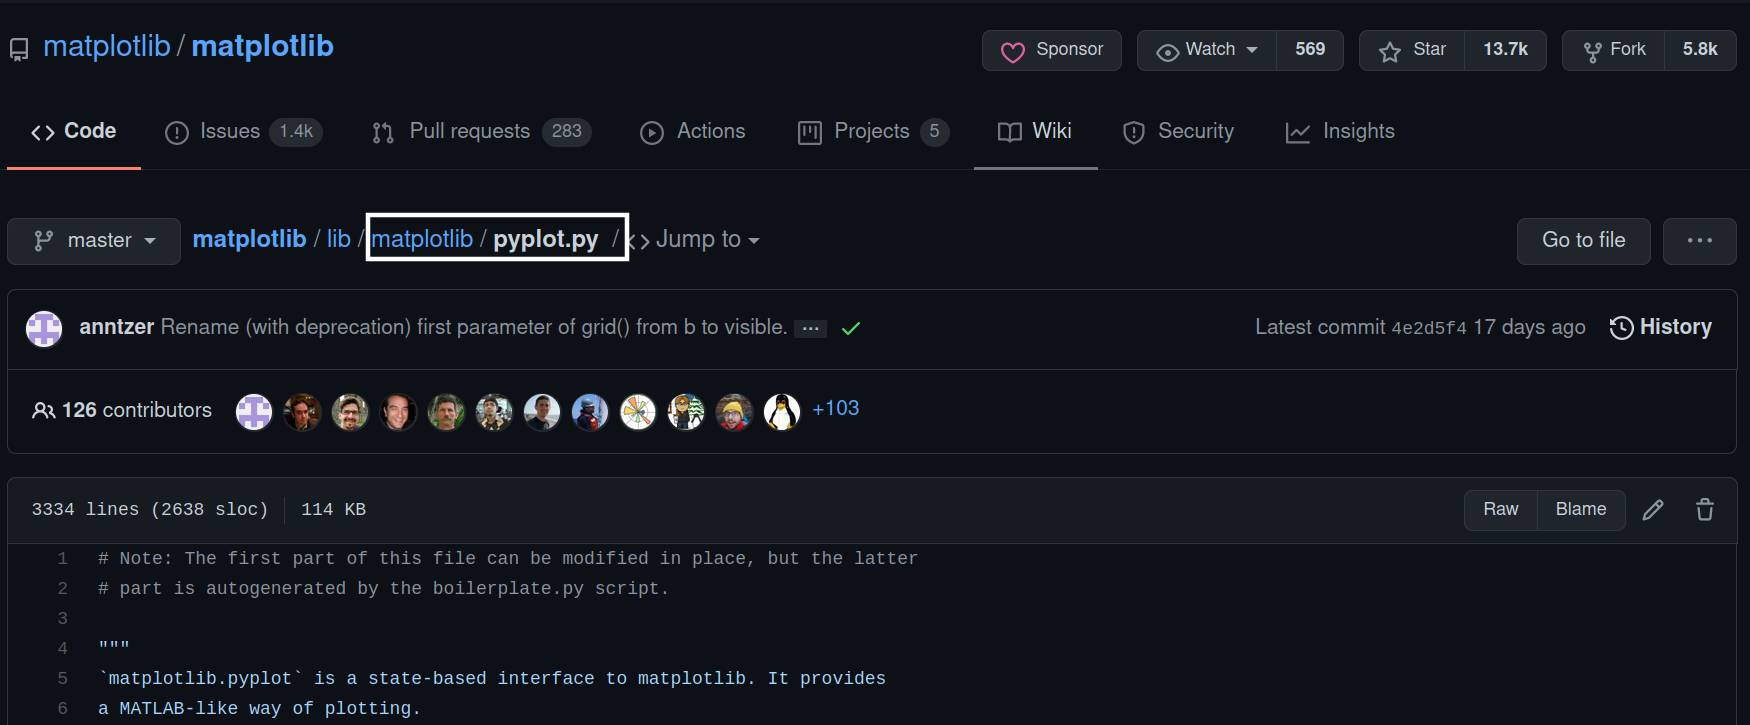

In [13]:
x = np.linspace(-50,50,1000)
print(x)
print(type(x))

[-50.         -49.8998999  -49.7997998  -49.6996997  -49.5995996
 -49.4994995  -49.3993994  -49.2992993  -49.1991992  -49.0990991
 -48.998999   -48.8988989  -48.7987988  -48.6986987  -48.5985986
 -48.4984985  -48.3983984  -48.2982983  -48.1981982  -48.0980981
 -47.997998   -47.8978979  -47.7977978  -47.6976977  -47.5975976
 -47.4974975  -47.3973974  -47.2972973  -47.1971972  -47.0970971
 -46.996997   -46.8968969  -46.7967968  -46.6966967  -46.5965966
 -46.4964965  -46.3963964  -46.2962963  -46.1961962  -46.0960961
 -45.995996   -45.8958959  -45.7957958  -45.6956957  -45.5955956
 -45.4954955  -45.3953954  -45.2952953  -45.1951952  -45.0950951
 -44.99499499 -44.89489489 -44.79479479 -44.69469469 -44.59459459
 -44.49449449 -44.39439439 -44.29429429 -44.19419419 -44.09409409
 -43.99399399 -43.89389389 -43.79379379 -43.69369369 -43.59359359
 -43.49349349 -43.39339339 -43.29329329 -43.19319319 -43.09309309
 -42.99299299 -42.89289289 -42.79279279 -42.69269269 -42.59259259
 -42.49249249 -42.39

In [14]:
gauss = np.exp(-x**2/100.0)
print(gauss)

[1.38879439e-11 1.53485501e-11 1.69593705e-11 1.87354905e-11
 2.06934725e-11 2.28514965e-11 2.52295142e-11 2.78494161e-11
 3.07352160e-11 3.39132500e-11 3.74123958e-11 4.12643108e-11
 4.55036924e-11 5.01685615e-11 5.53005724e-11 6.09453493e-11
 6.71528551e-11 7.39777913e-11 8.14800350e-11 8.97251142e-11
 9.87847260e-11 1.08737300e-10 1.19668614e-10 1.31672458e-10
 1.44851365e-10 1.59317399e-10 1.75193016e-10 1.92611999e-10
 2.11720473e-10 2.32678010e-10 2.55658827e-10 2.80853093e-10
 3.08468340e-10 3.38731003e-10 3.71888089e-10 4.08208981e-10
 4.47987410e-10 4.91543583e-10 5.39226490e-10 5.91416415e-10
 6.48527650e-10 7.11011437e-10 7.79359158e-10 8.54105792e-10
 9.35833652e-10 1.02517644e-09 1.12282362e-09 1.22952520e-09
 1.34609681e-09 1.47342529e-09 1.61247472e-09 1.76429285e-09
 1.93001819e-09 2.11088755e-09 2.30824424e-09 2.52354696e-09
 2.75837931e-09 3.01446017e-09 3.29365481e-09 3.59798691e-09
 3.92965156e-09 4.29102926e-09 4.68470098e-09 5.11346446e-09
 5.58035175e-09 6.088648

Text(0.5, 1.0, 'Gaussian function')

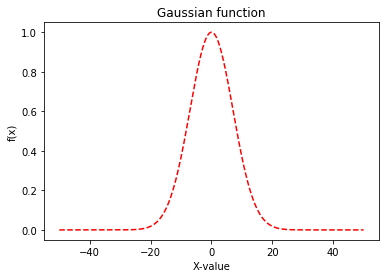

In [15]:
# plt.plot(x,gauss)
# plt.plot(x,gauss,color='red')
plt.plot(x,gauss,color='red',linestyle='--')
plt.xlabel("X-value")
plt.ylabel("f(x)")
plt.title("Gaussian function")

### Image visualization

<font size=4>

Let us define a 2-D Gaussian of the form: $$e^{-(x-5)^2/25-(y-5)^2/25}+e^{-(x+5)^2/25-(y+5)^2/25}$$    
    
</font>

In [16]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
xx,yy = np.meshgrid(x,y)
doublegauss = np.exp(-(xx-5)**2/25.0-(yy-5)**2/25.0)+np.exp(-(xx+5)**2/25.0-(yy+5)**2/25.0)

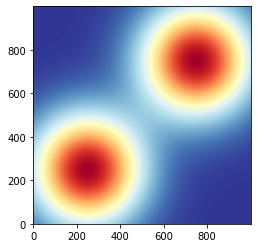

In [17]:
plt.imshow(doublegauss,cmap='RdYlBu_r',origin='lower')

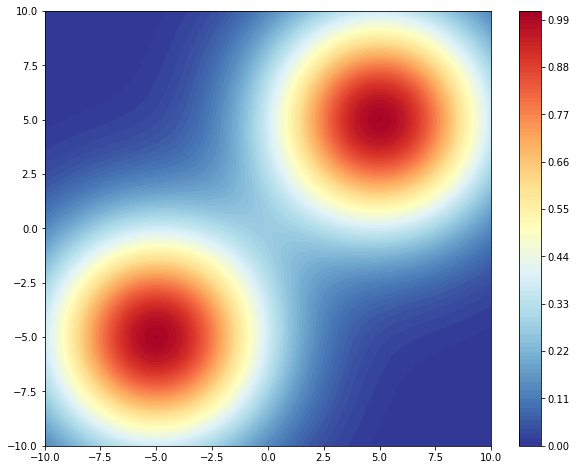

In [18]:
plt.figure(figsize=(10,8))
plt.contourf(x,y,doublegauss,100,cmap='RdYlBu_r')
plt.colorbar()

## Can we visualize astro data?

<br>
<font size=4>

Astrophysics data is generally available in FITS format. Think of them as a file with multiple "shelves".
- Each data set - for example, one wavelength of observation - can be put in one shelf. 
- Each shelf has a "data" and a "header".
    - Header contains information on the satellite, location of object, Field of view, resolution, etc.
    - Data contains the actual counts.
    
We are going to use $\color{#ef476f}{Astropy}$ for this!
    
    
</font>

In [2]:
from astropy.io import fits

Data available at: https://www.lmsal.com/hek/hcr?cmd=view-event&event-id=ivo%3A%2F%2Fsot.lmsal.com%2FVOEvent%23VOEvent_IRIS_20141022_081850_3860261381_2014-10-22T08%3A18%3A502014-10-22T08%3A18%3A50.xml

In [20]:
!mkdir Data/

In [21]:
!wget https://www.lmsal.com/solarsoft/irisa/data/level2_compressed/2014/10/22/20141022_081850_3860261381/iris_l2_20141022_081850_3860261381_SDO.tar.gz

--2021-05-30 18:40:50--  https://www.lmsal.com/solarsoft/irisa/data/level2_compressed/2014/10/22/20141022_081850_3860261381/iris_l2_20141022_081850_3860261381_SDO.tar.gz
Resolving www.lmsal.com (www.lmsal.com)... 166.21.250.149
Connecting to www.lmsal.com (www.lmsal.com)|166.21.250.149|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://iris.aws.lmsal.com/data/level2_compressed/2014/10/22/20141022_081850_3860261381/iris_l2_20141022_081850_3860261381_SDO.tar.gz [following]
--2021-05-30 18:40:52--  https://iris.aws.lmsal.com/data/level2_compressed/2014/10/22/20141022_081850_3860261381/iris_l2_20141022_081850_3860261381_SDO.tar.gz
Resolving iris.aws.lmsal.com (iris.aws.lmsal.com)... 54.192.66.40, 54.192.66.129, 54.192.66.111, ...
Connecting to iris.aws.lmsal.com (iris.aws.lmsal.com)|54.192.66.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6317064603 (5.9G) [application/x-tar]
Saving to: ‘iris_l2_20141022_081850_3860261381_SD

In [24]:
!tar -xvf iris_l2_20141022_081850_3860261381_SDO.tar.gz 

aia_l2_20141022_081850_3860261381_131.fits
aia_l2_20141022_081850_3860261381_211.fits
aia_l2_20141022_081850_3860261381_335.fits
aia_l2_20141022_081850_3860261381_304.fits
aia_l2_20141022_081850_3860261381_94.fits
aia_l2_20141022_081850_3860261381_193.fits
aia_l2_20141022_081850_3860261381_1700.fits
aia_l2_20141022_081850_3860261381_171.fits
aia_l2_20141022_081850_3860261381_1600.fits


In [3]:
aia = fits.open("aia_l2_20141022_081850_3860261381_171.fits")
print(aia.info())

Filename: aia_l2_20141022_081850_3860261381_171.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   (472, 470, 2987)   int16   
  1                1 ImageHDU        27   (20, 2987)   float64   
  2                1 TableHDU        28   2987R x 4C   [A0, A0, A0, A100]   
None


In [4]:
aia[0].header

SIMPLE  =                    T / Written by IDL:  Sat May 16 21:17:17 2020      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  472 /                                                
NAXIS2  =                  470 /                                                
NAXIS3  =                 2987 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2020-05-17'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= '        '           /                                                
INSTRUME= 'AIA_3   '           /                                                
DATA_LEV=              2.000

In [5]:
aiadata = aia[0].data
aiahead = aia[0].header

In [6]:
print(aiadata.shape)

(2987, 470, 472)


In [7]:
from astropy.wcs import WCS

In [8]:
wcs  = WCS(aiahead)
print(wcs)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'Time'  
CRVAL : -0.06921916666666666  -0.0839136111111111  17576.75  
CRPIX : 237.0  236.0  1494.0  
PC1_1 PC1_2 PC1_3  : 0.699094  0.715059  0.0  
PC2_1 PC2_2 PC2_3  : -0.715059  0.699094  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 0.00016666667328944445  0.00016666667328944445  12.2531815137  
NAXIS : 472  470  2987


  'arcsecs' -> 'arcsec',
  'arcsecs' -> 'arcsec',
  'seconds' -> 's'. [astropy.wcs.wcs]


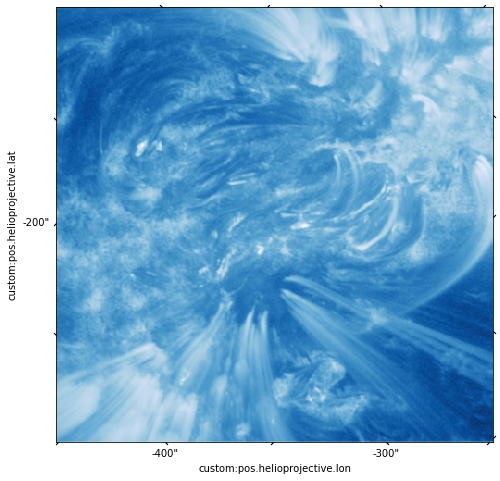

In [9]:
#Plot at first time step.
ind = 50
plt.figure(figsize=(8,8))
plt.subplot(projection = wcs.dropaxis(-1))
plt.imshow(np.log10(aiadata[ind]),cmap='Blues_r')

## Exercise

Make a video with all the frames of this data and submit. You may use any wavelength and any colormap you like.

You will need to add the frame number on the title and keep updating it in the video.

As a hint, use the `celluloid' library for making the vide.

In [10]:
!pip install celluloid

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from celluloid import Camera

In [12]:
aiadata.shape[0]

2987

/home/uvishal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/uvishal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


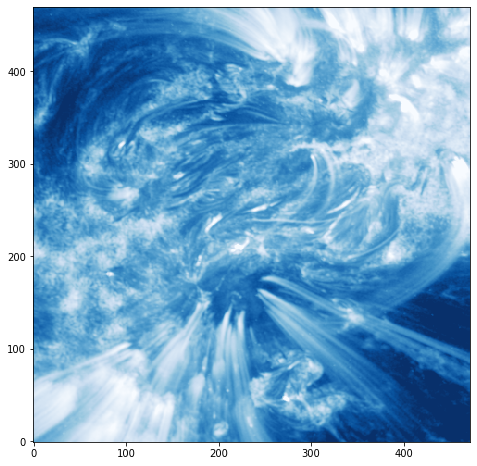

In [13]:
# Write code to load data, take frame and then make video.
# Check the example code here and adapt it: https://github.com/jwkvam/celluloid.
fig = plt.figure(figsize=(8,8))
camera = Camera(fig)
for ind in np.arange(10):
    val = np.log10(aiadata[ind])
    plt.imshow(val,cmap='Blues_r',clim=(np.nanpercentile(np.log10(aiadata),5),np.nanpercentile(np.log10(aiadata),99)),origin='lower')
    camera.snap()    


In [14]:
from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())

## Visualizing data frames

<br>
<font size=4>

Not all astro data comes in fits format. Sometimes, tabulated data is saved as `csv' or **Comma Separated Values**. Think of these as Excel sheets with the column names as some variable, and rows representing different observations of these variables.
    
**$\color{#76c893}{Pandas}$** is the go-to library for working with such data. Let's see how this works out.
    
    
</font>

First, I have some data downloaded already. Let's get it from Google drive.

In [1]:
!gdown --id 1D7OZ_ibIjl-2clagDXHBgiX_-BxAycmK Data/

Downloading...
From: https://drive.google.com/uc?id=1D7OZ_ibIjl-2clagDXHBgiX_-BxAycmK
To: /content/Skyserver_12_15_2020 3 45 07 AM.csv
82.5MB [00:01, 80.8MB/s]


In [2]:
import pandas as pd

In [4]:
Data = pd.read_csv("Skyserver_12_15_2020 3 45 07 AM.csv",comment="#")

In [5]:
Data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237678877245244171,318.951692,9.315146,19.51665,18.50036,17.95667,17.53139,17.32035,7777,301,5,53,819657923239110656,GALAXY,0.114299,728,52520,10
1,1237668332026986542,217.940001,14.608378,19.13548,18.55482,17.95603,17.68272,17.63717,5322,301,3,56,6154252554903769088,QSO,1.802680,5466,56033,304
2,1237664092899115053,129.948221,25.213328,19.54955,18.19434,17.83220,17.51329,17.47054,4335,301,3,130,2173034979993348096,GALAXY,0.070813,1930,53347,175
3,1237654604252119048,160.357788,3.567886,17.72343,16.65830,16.23667,16.07098,16.02797,2126,301,1,275,649647859372681216,STAR,0.000570,577,52367,13
4,1237661360769400880,226.001700,38.619699,16.60500,15.66234,15.39406,15.29443,15.29302,3699,301,2,227,5817649714997514240,STAR,-0.000184,5167,56066,454


In [6]:
Data['ra'].values.shape

(500000,)

In [10]:
Data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffab0a47c10>,
      dtype=object)

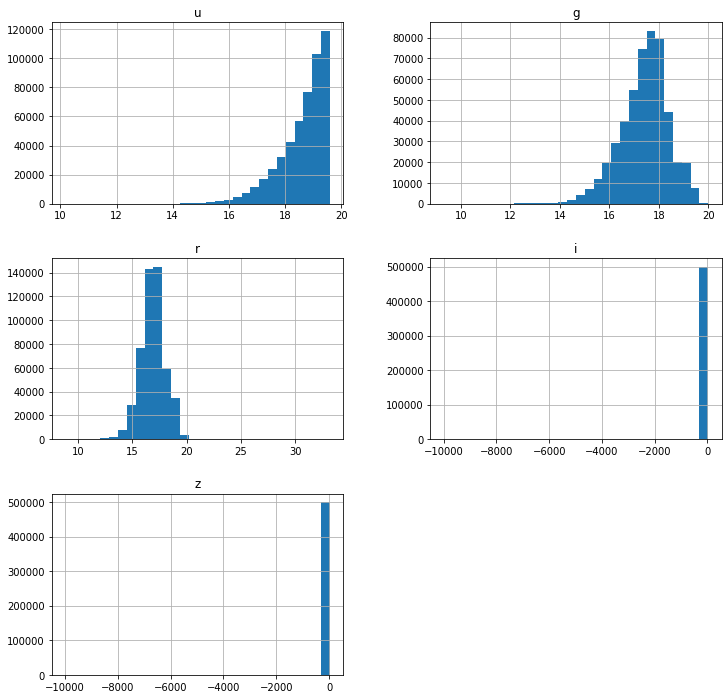

In [19]:
Data.hist(column = ["u","g","r","i","z"],figsize=(12,12),bins=30)

Why is magnitude negative? Let's check

In [20]:
Data['i'].min()

-9999.0

-9999.0 or any such number represents missing data. Hence, we have two options:
1. Drop rows where the value is this filler value.
2. Interpolate across these values.

I don't like interpolation, since each object is just unique. Hence, we drop these rows

In [29]:
#First, replace with nan
Data = Data.replace(-9999.0,np.nan)
Data.dropna(inplace=True)

In [30]:
Data['i'].min()

7.652014

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffab05b6290>,
      dtype=object)

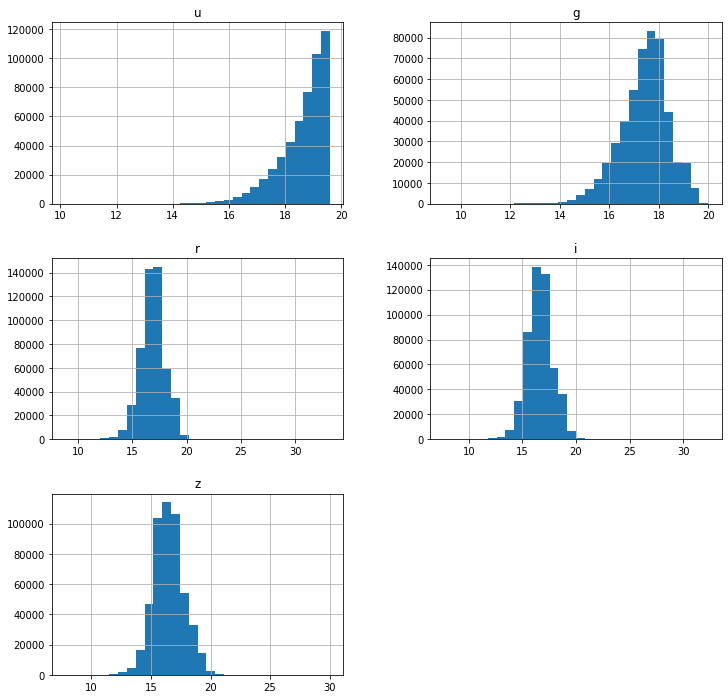

In [31]:
Data.hist(column = ["u","g","r","i","z"],figsize=(12,12),bins=30)